In [1]:
import math as mt
import matplotlib.pyplot as plt
import csv
import numpy as np

# Lijsten waarin we alle resultaten verzamelen
lijst_CoR = []
lijst_pressure = []
lijst_fout_CoR = []
lijst_fout_pressure = []


In [2]:
def analyseer_bestand(bestand, druk, index_bounce_1, index_bounce_2):
    lijst_ywaarde_string = []
    lijst_frame_string = []

    # Data inlezen
    with open(bestand, 'r') as data:
        for regel in data:
            data_regels_opgeknipt = regel.strip().split()
            data_getallen_opgeknipt = data_regels_opgeknipt[0].split(',')
            lijst_frame_string.append(data_getallen_opgeknipt[0])
            lijst_ywaarde_string.append(data_getallen_opgeknipt[2])

    # Header verwijderen
    del lijst_frame_string[0]
    del lijst_ywaarde_string[0]

    # Omzetten naar juiste types
    lijst_ywaarde = [float(k) for k in lijst_ywaarde_string]
    lijst_frame = [int(i) for i in lijst_frame_string]

    # Y-waarden omdraaien (1088 - y)
    lijst_ywaarde_omgekeerd = [1088 - y for y in lijst_ywaarde]

    # Plot maken
    plt.plot(lijst_frame, lijst_ywaarde_omgekeerd, 'r')
    plt.xlabel("Tijd (Frames)")
    plt.ylabel("Hoogte (pixels)")
    plt.title(f"Hoogte vs Tijd ({druk} mbar)")
    plt.show()

    # Maxima vinden (stuiters)
    lijst_max_hoogtes = []
    for i in range(len(lijst_ywaarde_omgekeerd)-1):
        dhoogte = lijst_ywaarde_omgekeerd[i+1] - lijst_ywaarde_omgekeerd[i]
        if dhoogte < 0 and lijst_ywaarde_omgekeerd[i] - lijst_ywaarde_omgekeerd[i-1] > 0:
            lijst_max_hoogtes.append(lijst_ywaarde_omgekeerd[i])

    # CoR berekenen
    CoR = lijst_max_hoogtes[index_bounce_2] / lijst_max_hoogtes[index_bounce_1]
    print(f"The CoR bij {druk} mbar is: {CoR}")
    
    lijst_pressure.append(druk)
    lijst_CoR.append(CoR)
    fout_hoogte_1 = 1.406
    fout_hoogte_2 = 1.406

    fout_CoR = ((fout_hoogte_1/lijst_max_hoogtes[index_bounce_1])**2 + (fout_hoogte_2/lijst_max_hoogtes[index_bounce_2])**2)**0.5 * CoR 
    print(f'De fout op de CoR is: {fout_CoR}')
    lijst_fout_CoR.append(fout_CoR)
    




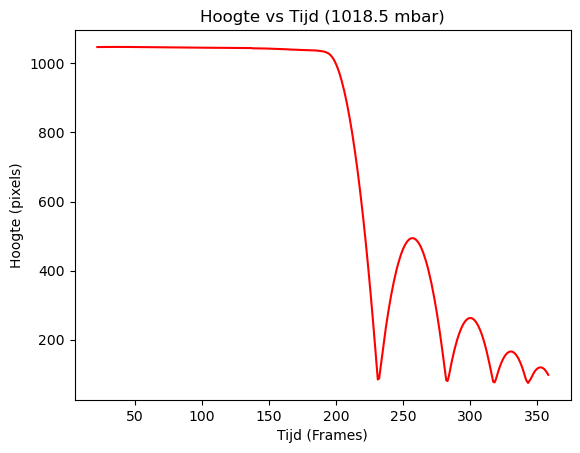

The CoR bij 1018.5 mbar is: 0.5321337442409626
De fout op de CoR is: 0.003223004251793391


In [3]:
analyseer_bestand('esults_100_1018,5hPa.csv', 1018.5, 26, 27)

# voor windows: analyseer_bestand("C:/Users/Gebruiker/Downloads/results_100_1018,5hPa.csv", 1018.5, 26, 27)


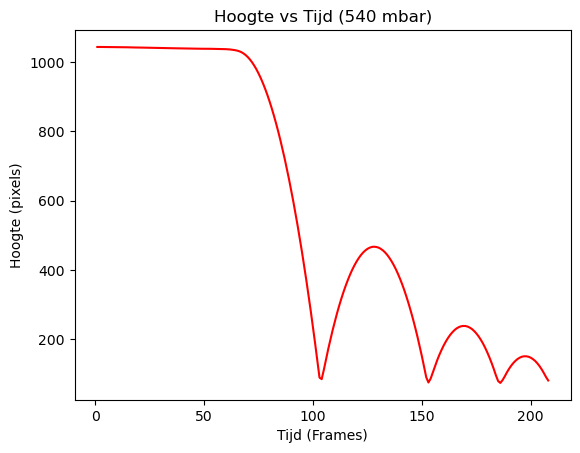

The CoR bij 540 mbar is: 0.5109889627606908
De fout op de CoR is: 0.003380270264491533


In [4]:
analyseer_bestand('results_100_540mbar.csv', 540, 6, 7)


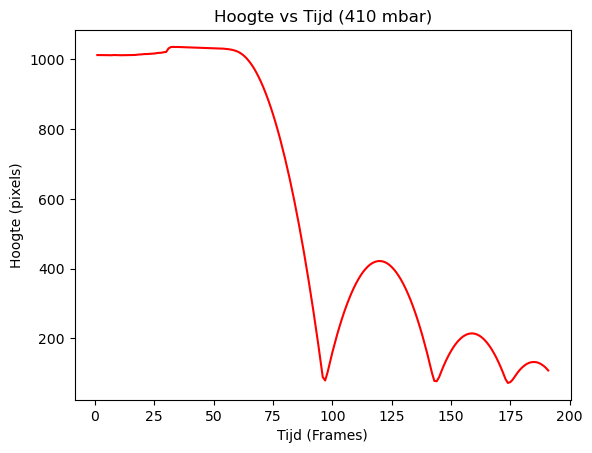

The CoR bij 410 mbar is: 0.507924439706742
De fout op de CoR is: 0.0037397626474045824


In [5]:
analyseer_bestand('results_100_410mbar.csv', 410, 8, 9)


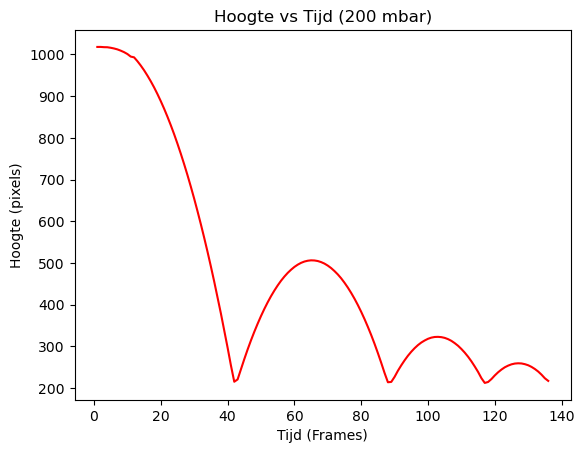

The CoR bij 200 mbar is: 0.6371767349932482
De fout op de CoR is: 0.003294334875426553


In [6]:
analyseer_bestand('results_100_200mbar.csv', 200, 1, 2)


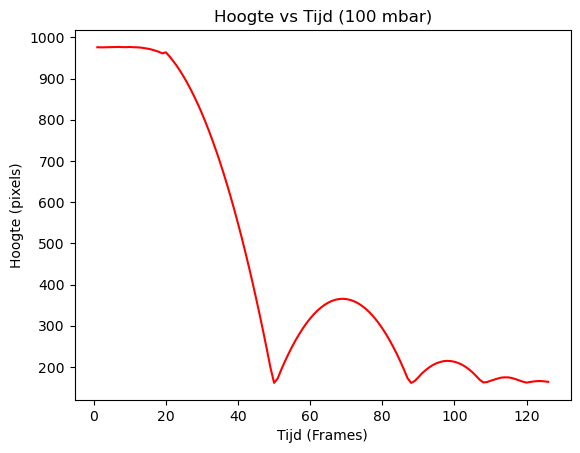

The CoR bij 100 mbar is: 0.5875368150267334
De fout op de CoR is: 0.004463478367396561


In [7]:
analyseer_bestand('results_100_100mbar.csv', 100, 4, 5)


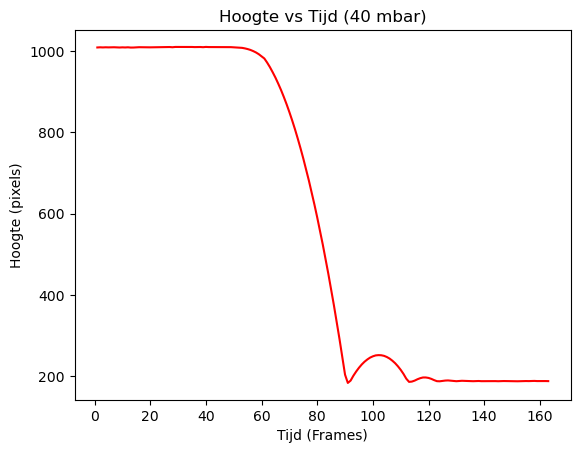

The CoR bij 40 mbar is: 0.24991167474105708
De fout op de CoR is: 0.0014362371041896813


In [8]:
analyseer_bestand('results_100_40mbar.csv', 40, 15, 16)


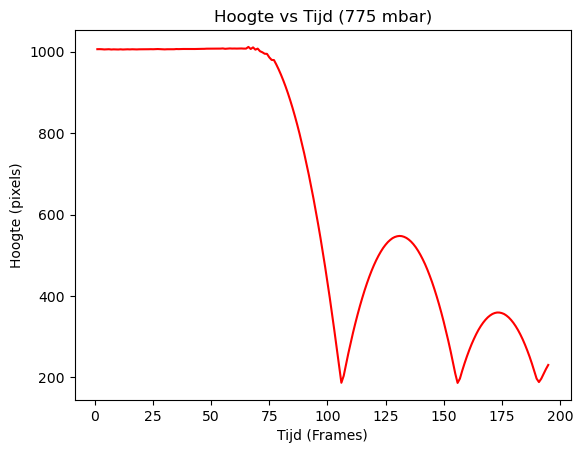

The CoR bij 775 mbar is: 0.5433872689173672
De fout op de CoR is: 0.0015884879424197663


In [9]:
analyseer_bestand('results_100_775mbar.csv', 775, 20, 21)


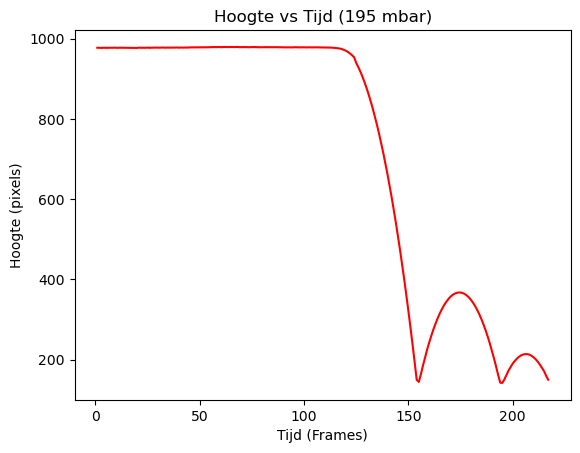

The CoR bij 195 mbar is: 0.3758642785442393
De fout op de CoR is: 0.0015364385768508433


In [10]:
analyseer_bestand('results_100_190mbar.csv', 195, 40, 41)


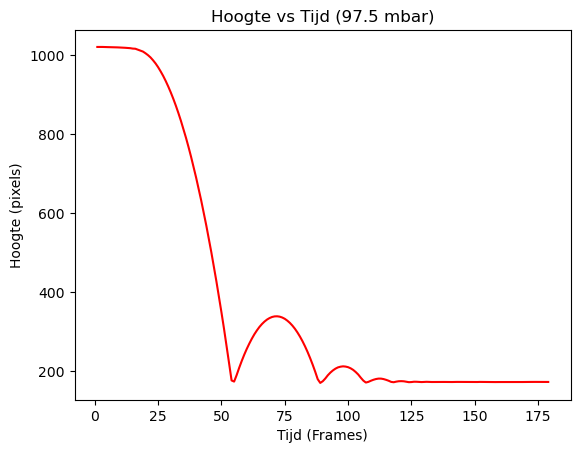

The CoR bij 97.5 mbar is: 0.33267968767229966
De fout op de CoR is: 0.0014517701502341342


In [11]:
analyseer_bestand('results_100_95mbar.csv', 97.5, 0, 1)


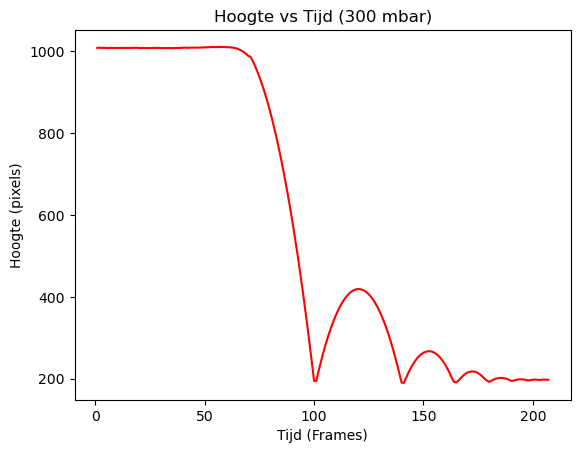

The CoR bij 300 mbar is: 0.41475829979099604
De fout op de CoR is: 0.0015065662132941267


In [12]:
analyseer_bestand('results_100_300mbar.csv', 300, 19, 20)

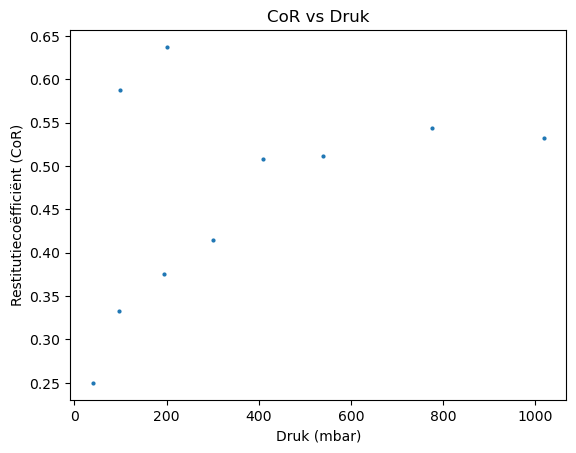

[1018.5, 540, 410, 200, 100, 40, 775, 195, 97.5, 300]
[0.5321337442409626, 0.5109889627606908, 0.507924439706742, 0.6371767349932482, 0.5875368150267334, 0.24991167474105708, 0.5433872689173672, 0.3758642785442393, 0.33267968767229966, 0.41475829979099604]


In [13]:
plt.errorbar(lijst_pressure, lijst_CoR, capsize = 5, markersize = 2, fmt='o')
plt.xlabel("Druk (mbar)")
plt.ylabel("Restitutiecoëfficiënt (CoR)")
plt.title("CoR vs Druk")
plt.show()

print(lijst_pressure)
print(lijst_CoR)

Foutvlaggen gaan bepalen.

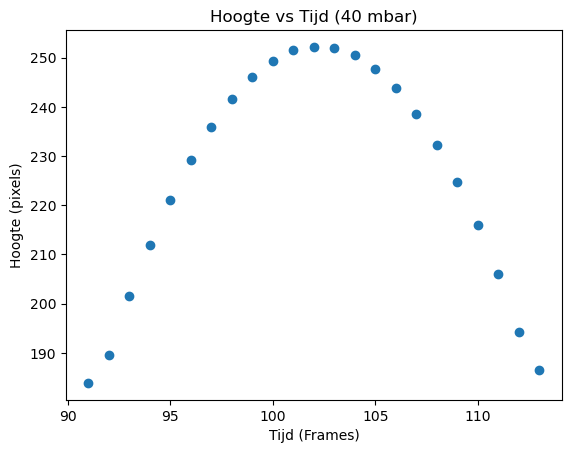

[1018.5, 540, 410, 200, 100, 40, 775, 195, 97.5, 300]


In [14]:
lijst_ywaarde_string = []
lijst_frame_string = []

# Data inlezen
with open('/Users/noor/Documents/eerstejaarsproject/experimentvacuum/berekeningen_metingen_17-7/results_100_40mbar.csv', 'r') as data:
    for regel in data:
        data_regels_opgeknipt = regel.strip().split()
        data_getallen_opgeknipt = data_regels_opgeknipt[0].split(',')
        lijst_frame_string.append(data_getallen_opgeknipt[0])
        lijst_ywaarde_string.append(data_getallen_opgeknipt[2])

# Header verwijderen
del lijst_frame_string[0]
del lijst_ywaarde_string[0]

# Omzetten naar juiste types
lijst_ywaarde = [float(k) for k in lijst_ywaarde_string]
lijst_frame = [int(i) for i in lijst_frame_string]

# Y-waarden omdraaien (1088 - y)
lijst_ywaarde_omgekeerd = [1088 - y for y in lijst_ywaarde]

# de parabool isoleren
lijst_frame = lijst_frame [90:]
lijst_ywaarde_omgekeerd = lijst_ywaarde_omgekeerd [90:]


lijst_frame = lijst_frame [:-50]
lijst_ywaarde_omgekeerd = lijst_ywaarde_omgekeerd [:-50]    

# Plot maken
plt.plot(lijst_frame, lijst_ywaarde_omgekeerd, 'o')
plt.xlabel("Tijd (Frames)")
plt.ylabel("Hoogte (pixels)")
plt.title(f"Hoogte vs Tijd (40 mbar)")
plt.show()

# Maxima vinden (stuiters)
# lijst_max_hoogtes = []
# for i in range(len(lijst_ywaarde_omgekeerd)-1):
#     dhoogte = lijst_ywaarde_omgekeerd[i+1] - lijst_ywaarde_omgekeerd[i]
#     if dhoogte < 0 and lijst_ywaarde_omgekeerd[i] - lijst_ywaarde_omgekeerd[i-1] > 0:
#         lijst_max_hoogtes.append(lijst_ywaarde_omgekeerd[i])

# CoR berekenen
# CoR = lijst_max_hoogtes[16] / lijst_max_hoogtes[15]
# print(f"The CoR bij {druk} mbar is: {CoR}")
    
# lijst_pressure.append(druk)
# lijst_CoR.append(CoR)

print (lijst_pressure)



In [15]:
from lmfit import Model
import numpy as np

def fit_parabool(x, a, b, c):
    return a * x**2 + b * x + c

mod_parabool = Model(fit_parabool)

# hoogte_err_array = np.array(hoogte_error)
# hoogte_gewichten = 1 / (hoogte_err_array)

fit_result = mod_parabool.fit(lijst_ywaarde_omgekeerd, x= lijst_frame, a=-1, b=1, c=1)

print(fit_result.fit_report())

[[Model]]
    Model(fit_parabool)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 23
    # variables        = 3
    chi-square         = 39.5446113
    reduced chi-square = 1.97723057
    Akaike info crit   = 18.4645101
    Bayesian info crit = 21.8709927
    R-squared          = 0.99666611
[[Variables]]
    a: -0.57655458 +/- 0.00747144 (1.30%) (init = -1)
    b:  117.834286 +/- 1.52481479 (1.29%) (init = 1)
    c: -5768.92415 +/- 77.5358790 (1.34%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9996
    C(b, c) = -0.9996
    C(a, c) = +0.9983


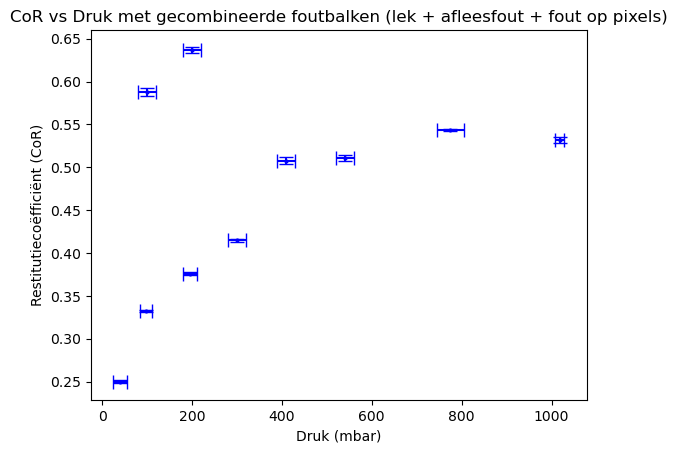

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# --- Centrale drukwaarden (middenwaarden) ---
lijst_pressure = [1018.5, 540, 410, 200, 100, 40, 775, 195, 97.5, 300]  # mbar


# --- CoR-waarden uit jouw berekeningen ---
lijst_CoR = [
    0.5321337442409626,  # 1018.5 mbar
    0.5109889627606908,  # 540 mbar
    0.507924439706742,   # 410 mbar
    0.6371767349932482,  # 200 mbar deze
    0.5875368150267334,  # 100 mbar  deze
    0.24991167474105708, # 40 mbar
    0.5433872689173672,  # 775 mbar
    0.3758642785442393,  # 190 mbar
    0.33267968767229966,  # 95 mbar
    0.41475829979099604  # 300 mbar
]

# --- Begin- en einddrukken (voor foutbalken) ---
# Hieruit bepalen we de totale onzekerheid (lek + afleesfout)
begin_druks = [
    1018.5,  # Atmosferisch (geen lek, enkel afleesfout)
    530, 400,  # Oude metingen (papier gelijk, druk varieert)
    190, 90, 35,  # Oude metingen (papier gelijk, druk varieert)
    755,  # Meting rond 775 mbar (pas aan indien nodig)
    190, 95, 290   # Metingen van vandaag
]

eind_druks = [
    1018.5,  # Atmosferisch
    550, 420,  # Oude metingen
    210, 110, 45,  # Oude metingen
    795,  # Meting rond 775 mbar (pas aan indien nodig)
    200, 100, 310  # Metingen van vandaag
]

# Afleesfout is altijd ±10 mbar
afleesfout = 10

# Bereken de foutbalken (asymmetrisch)
x_errors = []
for i, midden in enumerate(lijst_pressure):
    min_val = min(begin_druks[i], eind_druks[i]) - afleesfout
    max_val = max(begin_druks[i], eind_druks[i]) + afleesfout
    lower_error = midden - min_val
    upper_error = max_val - midden
    x_errors.append([[lower_error], [upper_error]])

# Plotten van CoR met foutbalken
for i in range(len(lijst_pressure)):
    plt.errorbar(lijst_pressure[i], lijst_CoR[i],
                 xerr=np.array(x_errors[i]), yerr = np.array(lijst_fout_CoR[i]), fmt='o', capsize=5, markersize = 2, color='blue')

plt.xlabel("Druk (mbar)")
plt.ylabel("Restitutiecoëfficiënt (CoR)")
plt.title("CoR vs Druk met gecombineerde foutbalken (lek + afleesfout + fout op pixels)")
plt.show()